### SQL to Python Connection

In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host='localhost',
                                         database='venmgmt',
                                         user='root',
                                         password='Nilimapande@23')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)

Connected to MySQL Server version  8.0.33
You're connected to database:  ('venmgmt',)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### 1. Payment Method Analysis

In [4]:
query1 = """ SELECT Pay_Method as PaymentMethod, Count(Pay_Method) as CountMethod
FROM Vendor 
GROUP BY Pay_Method """

query1_df = pd.read_sql_query(query1, connection)

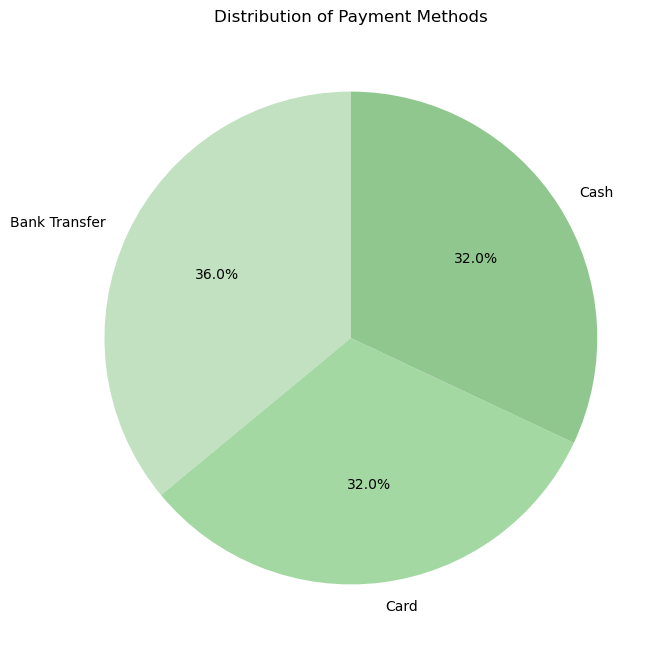

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

colors = ['#C1E1C1', '#A3D8A3', '#8FC78F']

plt.figure(figsize=(8, 8))
plt.pie(query1_df['CountMethod'], labels=query1_df['PaymentMethod'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Payment Methods')
plt.show()

### 2. Analysis of Quantity of Services Requested 

In [6]:
query2 = """SELECT Det_Desc as DescReq, Count(Det_Desc) as TotalReq
FROM PO_Detail
GROUP BY Det_Desc
"""

query2_df = pd.read_sql_query(query2, connection)

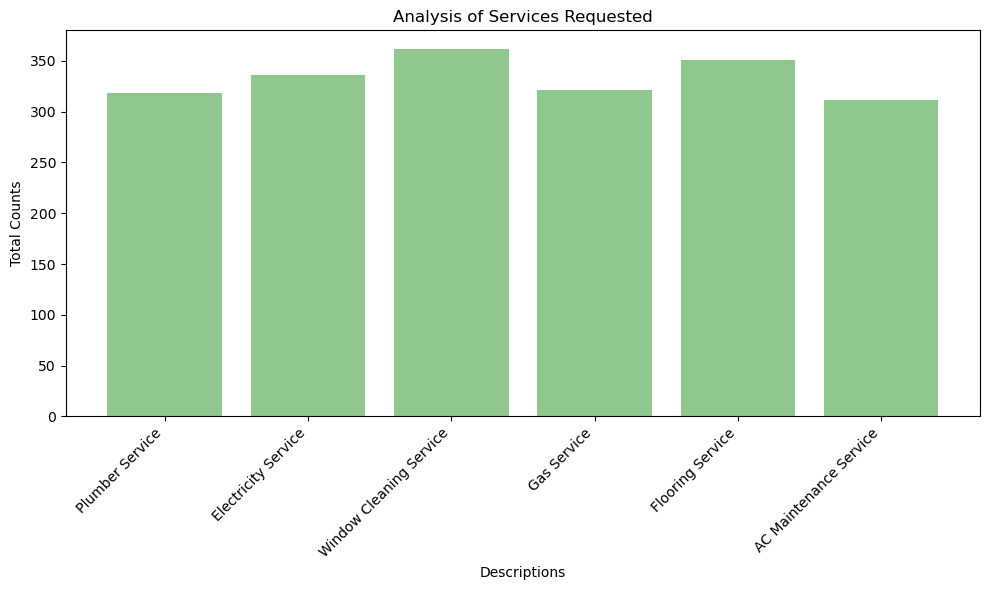

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(query2_df['DescReq'], query2_df['TotalReq'], color='#8FC78F')

plt.xlabel('Descriptions')
plt.ylabel('Total Counts')
plt.title('Analysis of Services Requested')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

### Importing table PO_Header

In [8]:
import pandas as pd

sql_query = """
select * from po_header
"""
# Execute the query and store the result in a DataFrame
po_header_df = pd.read_sql_query(sql_query, connection)

In [9]:
po_header_df.head()

,PO_ID,TotalAmt,ReqDt,Ven_ID,Ten_ID
0,1,807,2021-05-11,9,1341
1,2,232,2021-03-12,8,1152
2,3,510,2021-01-01,1,822
3,4,243,2021-01-31,46,1393
4,5,370,2021-09-04,2,1529


### 3. Number of POs requested per month in 2021

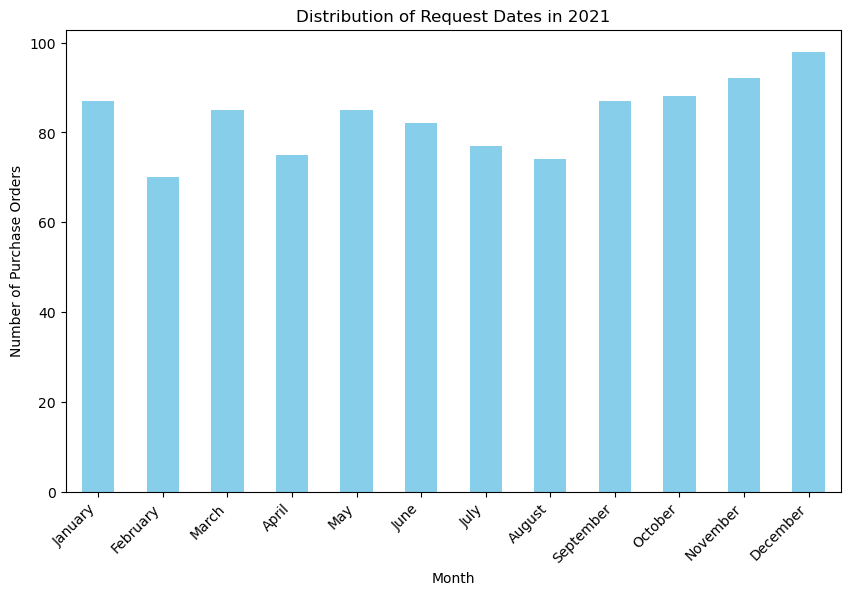

In [10]:
import matplotlib.pyplot as plt
from calendar import month_name

# Convert 'ReqDt' column to datetime format
po_header_df['ReqDt'] = pd.to_datetime(po_header_df['ReqDt'])

# Filter data for the year 2021
po_header_df_2021 = po_header_df[po_header_df['ReqDt'].dt.year == 2021]

# Extract month from 'ReqDt' and create a new column
po_header_df_2021['Month'] = po_header_df_2021['ReqDt'].dt.month

# Group by 'Month' and count the number of records in each month
monthly_distribution = po_header_df_2021['Month'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 6))
monthly_distribution.plot(kind='bar', color='skyblue')

# Set x-axis ticks and labels
month_names = [month_name[i] for i in range(1, 13)]  # Generate month names from 1 to 12
plt.xticks(monthly_distribution.index - 1, month_names, rotation=45, ha="right")

plt.title('Distribution of Request Dates in 2021')
plt.xlabel('Month')
plt.ylabel('Number of Purchase Orders')
plt.show()

### 4. Total Amount of PO requested per vendor

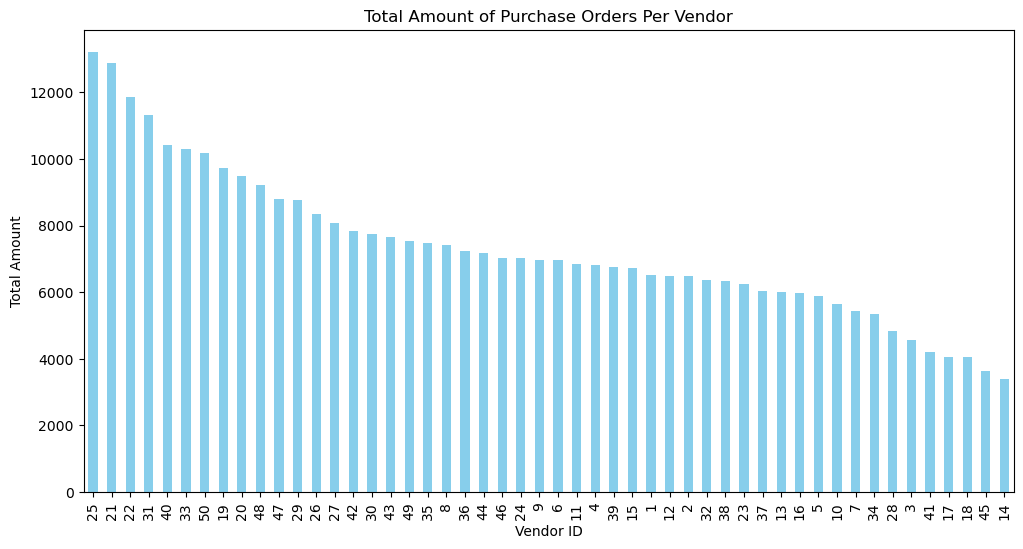

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named po_header_df
# Convert 'ReqDt' column to datetime format
po_header_df['ReqDt'] = pd.to_datetime(po_header_df['ReqDt'])

# Extract year from 'ReqDt' and create a new column
po_header_df['Year'] = po_header_df['ReqDt'].dt.year

# Group by 'Ven_ID' and calculate the total amount of purchase orders per vendor
total_amounts_per_vendor = po_header_df.groupby('Ven_ID')['TotalAmt'].sum()

# Plot a bar plot
plt.figure(figsize=(12, 6))
total_amounts_per_vendor.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Amount of Purchase Orders Per Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Total Amount')
plt.show()

### 5. Number of Purchase Orders per Vendor

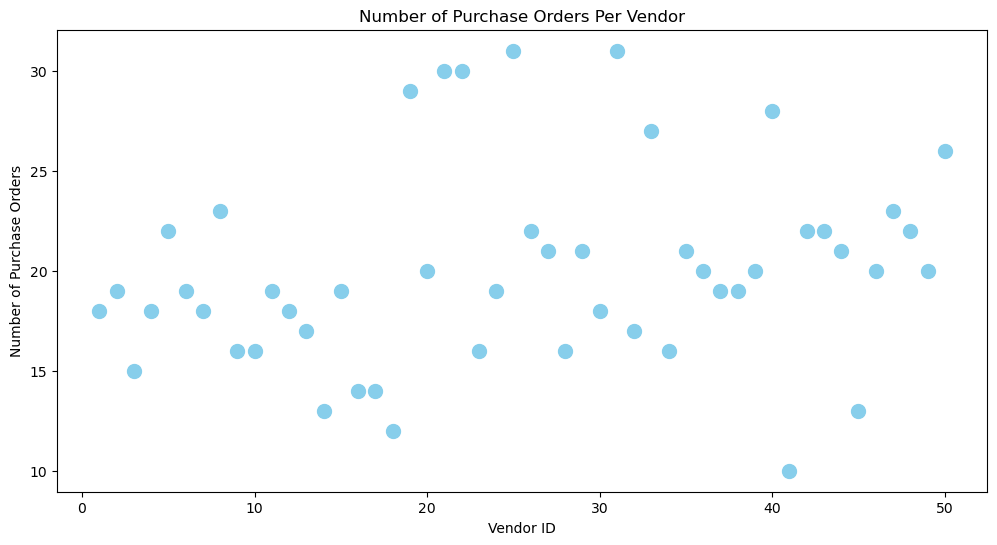

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Ven_ID' and count the number of purchase orders per vendor
purchase_orders_per_vendor = po_header_df['Ven_ID'].value_counts()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(purchase_orders_per_vendor.index, purchase_orders_per_vendor.values, color='skyblue', s=100)
plt.title('Number of Purchase Orders Per Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Number of Purchase Orders')
plt.show()

#### Importing table Vendor

In [13]:
sql_query = """
select * from vendor
"""
# Execute the query and store the result in a DataFrame
vendor_df = pd.read_sql_query(sql_query, connection)

In [14]:
vendor_df.head()

,Per_ID,Ven_Add,Pay_Method,Categ_ID
0,1,"5630 Maria River Apt. 225, Amherst",Bank Transfer,1
1,2,"459 Lindsey Manor, Boston",Card,2
2,3,"45886 Maynard Brook, Raleigh",Cash,3
3,4,"086 Garrison Forest Suite 735, Lowell",Bank Transfer,4
4,5,"90299 Powell Track, Boston",Card,5


### 6. Vendors Payment Method Distribution

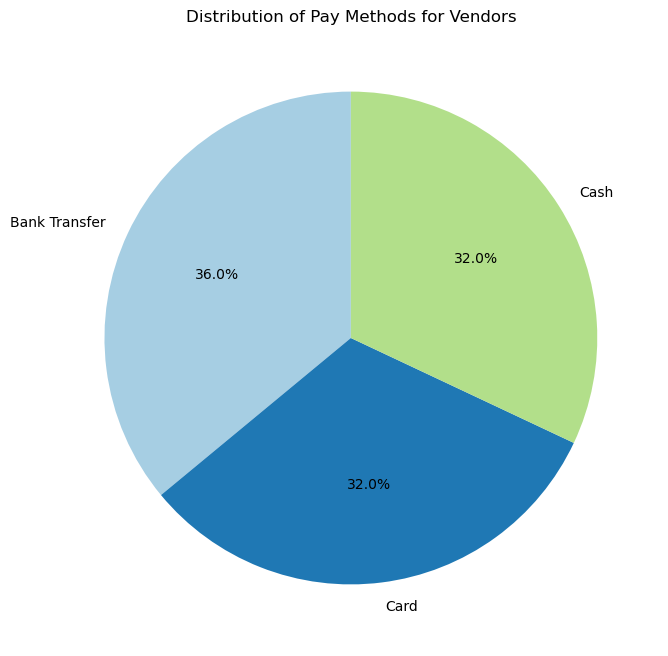

In [15]:
# Grouping by 'Pay_Method' and calculating counts
pay_method_counts = vendor_df['Pay_Method'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(pay_method_counts, labels=pay_method_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Pay Methods for Vendors')
plt.show()

#### Importing table vendor_categ

In [16]:
sql_query = """
select * from vendor_categ
"""
# Execute the query and store the result in a DataFrame
vendor_categ_df = pd.read_sql_query(sql_query, connection)

In [17]:
# Merge the dataframes on 'Categ_ID'
merged_df = pd.merge(vendor_df, vendor_categ_df, on='Categ_ID', how='inner')

# Display the merged dataframe
merged_df.head()

,Per_ID,Ven_Add,Pay_Method,Categ_ID,Categ_Desc
0,1,"5630 Maria River Apt. 225, Amherst",Bank Transfer,1,Electric
1,14,"2132 Ortiz Lakes, Amherst",Bank Transfer,1,Electric
2,15,"4492 Taylor Burgs, Lowell",Card,1,Electric
3,28,"11674 Welch Valleys Apt. 956, Charlotte",Cash,1,Electric
4,29,"5521 Peck Overpass Suite 514, Amherst",Bank Transfer,1,Electric


### 7. Vendors per category

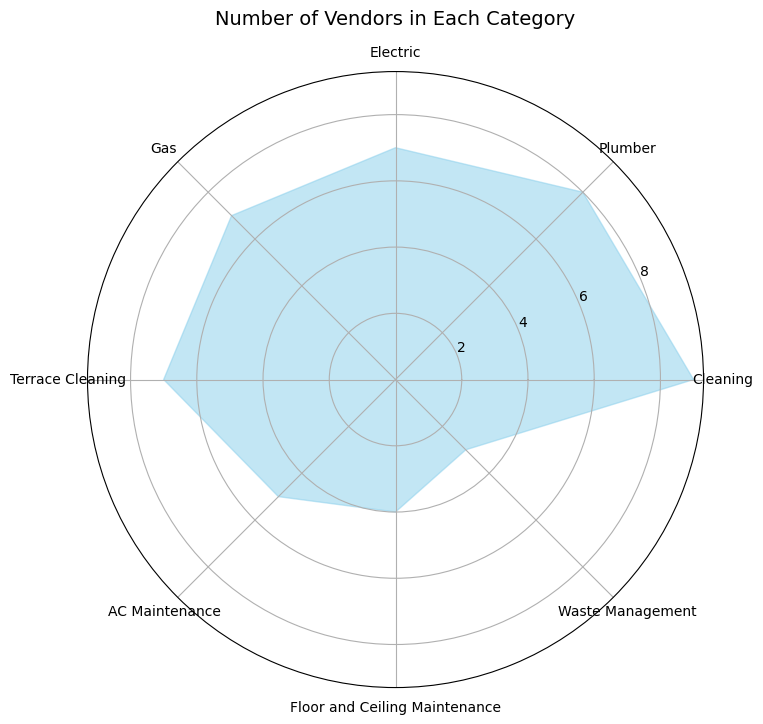

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group by 'Categ_Desc' and count the number of vendors in each category
vendor_count_by_category = merged_df['Categ_Desc'].value_counts()

# Create a radar chart
categories = vendor_count_by_category.index
values = vendor_count_by_category.values

# Calculate angles for each category
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)

# Plot the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.5)
ax.set_thetagrids(angles * 180 / np.pi, labels=categories)
ax.set_title('Number of Vendors in Each Category', size=14, pad=15)

plt.show()

#### Importing table inv_header

In [19]:
sql_query = """
select * from inv_header
"""
# Execute the query and store the result in a DataFrame
inv_header_df = pd.read_sql_query(sql_query, connection)

#### Importing table inv_detail

In [20]:
sql_query = """
select * from inv_detail
"""
# Execute the query and store the result in a DataFrame
inv_detail_df = pd.read_sql_query(sql_query, connection)

### 8. Quantity to Detail Description

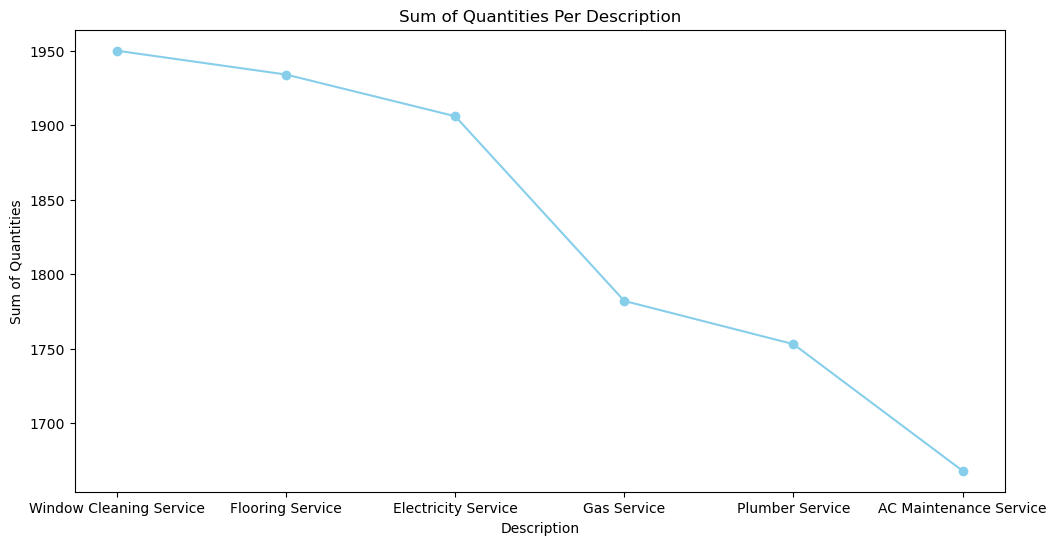

In [21]:
# Group by 'Det_Desc' and sum the 'Quantity' for each description
sum_quantities_per_desc = inv_detail_df.groupby('Det_Desc')['Quantity'].sum()

# Plot a line plot
plt.figure(figsize=(12, 6))
sum_quantities_per_desc.sort_values(ascending=False).plot(kind='line', marker='o', color='skyblue')
plt.title('Sum of Quantities Per Description')
plt.xlabel('Description')
plt.ylabel('Sum of Quantities')
plt.show()

### 9. Average price per Description

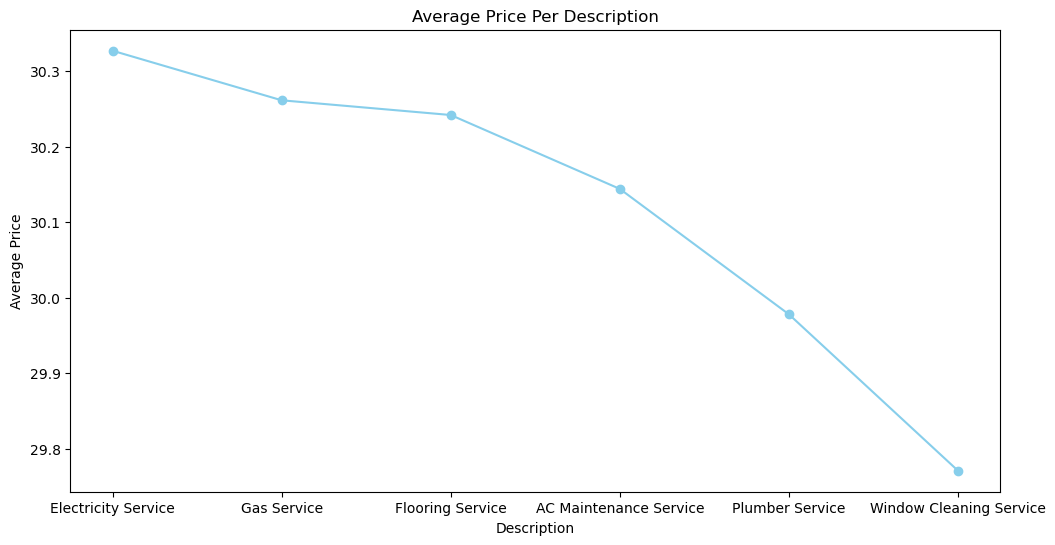

In [22]:
# Group by 'Det_Desc' and calculate the average 'UnitPrice' for each description
average_price_per_desc = inv_detail_df.groupby('Det_Desc')['UnitPrice'].mean()

# Plot a line plot
plt.figure(figsize=(12, 6))
average_price_per_desc.sort_values(ascending=False).plot(kind='line', marker='o', color='skyblue')
plt.title('Average Price Per Description')
plt.xlabel('Description')
plt.ylabel('Average Price')
plt.show()

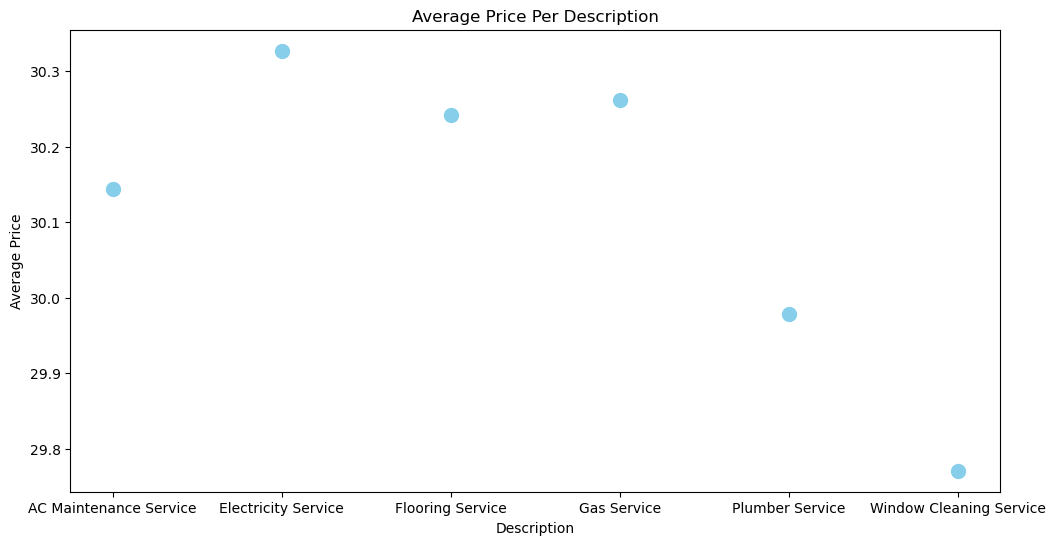

In [23]:
# Group by 'Det_Desc' and calculate the average 'UnitPrice' for each description
average_price_per_desc = inv_detail_df.groupby('Det_Desc')['UnitPrice'].mean()

# Plot a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(average_price_per_desc.index, average_price_per_desc.values, color='skyblue', s=100)
plt.title('Average Price Per Description')
plt.xlabel('Description')
plt.ylabel('Average Price')
plt.show()

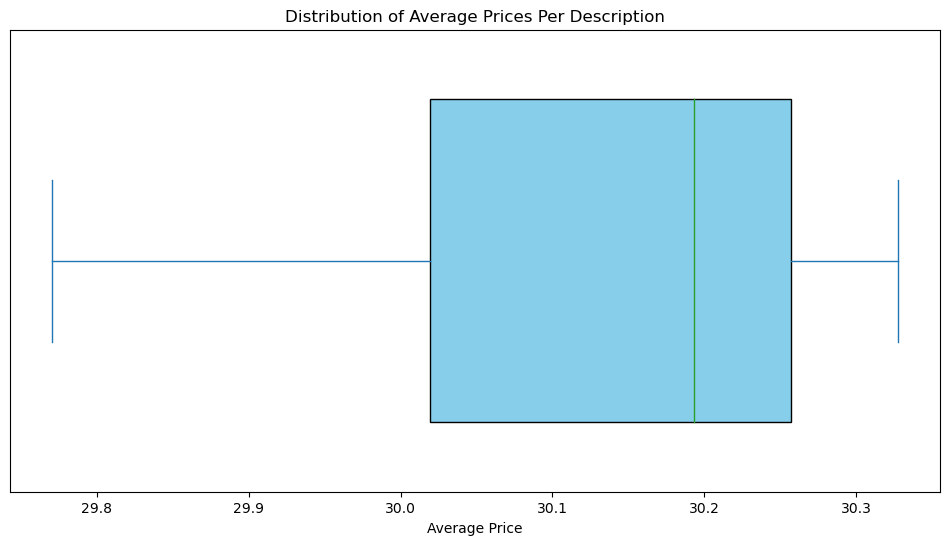

In [24]:
# Group by 'Det_Desc' and get the average 'UnitPrice' for each description
average_price_per_desc = inv_detail_df.groupby('Det_Desc')['UnitPrice'].mean()

# Create a box plot
plt.figure(figsize=(12, 6))
average_price_per_desc.sort_values(ascending=False).plot(kind='box', vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Distribution of Average Prices Per Description')
plt.xlabel('Average Price')
plt.yticks([])  # Hide y-axis ticks
plt.show()